In [1]:
import pandas as pd
import numpy as np
plant = pd.read_csv('plant.csv')

In [3]:
plant.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F15,F16,F17,F18,F19,F20,F21,F22,F23,T
0,0.559318,0.168862,7.257456,0.013264,2.442463,0.338663,0.909578,0.124971,0.863168,0.124971,...,10.004906,107.249273,2.179754,3.523551,0.282158,0.655862,-0.540350,0.962611,0.936937,1
1,0.579257,0.159956,7.120799,0.297232,2.166805,0.314408,0.908118,0.150460,0.871048,0.150460,...,10.235738,111.299146,2.063268,3.340540,0.262196,0.634552,-0.529002,0.953792,0.917768,1
2,0.597987,0.189701,7.337628,-0.579806,2.710970,0.367551,0.922431,0.119970,0.858656,0.119970,...,10.558140,120.576853,2.224622,3.616883,0.307822,0.675735,-0.548102,0.967041,0.955676,1
3,0.553882,0.208003,7.514766,-0.244880,2.287137,0.352471,0.936713,0.119164,0.863590,0.119164,...,9.866824,108.118823,2.305432,3.729462,0.295240,0.667436,-0.575286,0.975177,0.955660,1
4,0.486785,0.193948,7.403279,0.172379,2.428262,0.336664,0.931038,0.117811,0.865823,0.117811,...,8.828852,87.361010,2.267637,3.650929,0.281250,0.653357,-0.573112,0.973051,0.940714,1


In [4]:
plant['T'].unique()

array([1, 2, 3, 4], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split
train,test =train_test_split(plant,test_size=0.3,random_state=100)
train_y =train['T']
test_y = test['T']
train_x=train.drop('T',axis=1)
test_x=test.drop('T',axis=1)

In [14]:
from sklearn.svm import SVC
model = SVC(kernel ='poly')
model.fit(train_x,train_y)
test_pred = model.predict(test_x)

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(test_y,test_pred)

0.75

In [16]:
param = [{'kernel':['linear'],'gamma':[1e-2,1e-3,1e-4,1e-5],'C':[0.001,0.10,0.1,10,25,50,100,1000]}]
from sklearn.model_selection import GridSearchCV
 svm_cv =GridSearchCV(model,param_grid =param)
svm_cv.fit(train_x,train_y)
svm_cv.best_params_ 

{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}

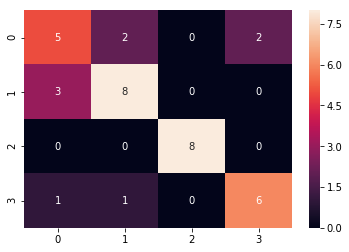

In [21]:
cp = confusion_matrix(test_y,test_pred)
import seaborn as sns
sns.heatmap(cp,annot = True,fmt='d')

In [22]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

targ = label_binarize(plant['T'],classes =[1,2,3,4])
n_classes =4
xtrain,xtest,ytrain,ytest = train_test_split(plant.drop('T',axis=1),plant['T'],test_size=0.3,random_state=0)

clf = OneVsRestClassifier(SVC(kernel ='poly',random_state= 0))
y_score = clf.fit(xtrain,ytrain).decision_function(xtest)

In [26]:
y_score

array([[-1.02860640e+01, -8.94697389e+00,  1.35151967e+00,
        -7.14733468e+00],
       [-3.85615190e+01, -1.04168685e+01, -3.17121612e-01,
         6.41172674e+00],
       [-3.70239488e+01, -1.01564913e+01, -5.62638215e-01,
         6.54520729e+00],
       [-9.86208706e-01, -9.20595071e+00, -9.62169476e-01,
        -3.91731237e+00],
       [-3.36516600e+01, -8.06098536e+00, -1.37470813e+00,
         6.16334207e+00],
       [ 2.94864226e+00, -3.61104049e+00, -1.42938606e+00,
        -5.37622058e+00],
       [ 3.20927047e+00, -7.16836530e+00, -1.90985369e-01,
        -3.90126463e+00],
       [ 9.12255657e+00, -6.58790624e+00, -1.57830452e+00,
        -6.42784357e+00],
       [-8.57294323e+01,  4.23935009e+01, -8.57511694e+00,
        -1.23525585e+01],
       [-4.59165660e+01, -1.57122705e+01,  1.17197130e+01,
        -2.00037108e+01],
       [-6.43667710e+00, -7.16276865e+00, -7.86182799e-01,
        -2.75105709e+00],
       [-3.71020733e-02,  2.07264723e+00, -3.92190495e+00,
      